Домашнее задание №6

(3 балла) Пощупайте данные: почитайте описание признаков, посмотрите на основные статистики, исследуйте данные на выбрсоы и на пропущенные значения, нарисуйте гистограммы 3 каких-нибудь признаков. Что вы на них видите? Нарисуйте диаграмы рассеивания каких-нибудь признаков. Какие выводы можно сделать? (На графиках должны быть заголовки и подписаны оси)

In [1]:
from sklearn import datasets
data = datasets.load_boston()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

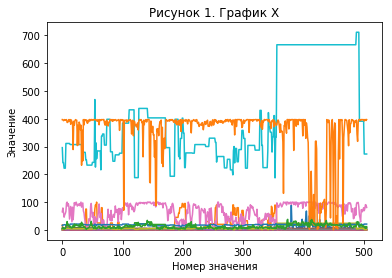

In [4]:
plt.plot(data.data)
plt.xlabel('Номер значения')
plt.ylabel('Значение')
plt.title('Рисунок 1. График X')
plt.show()

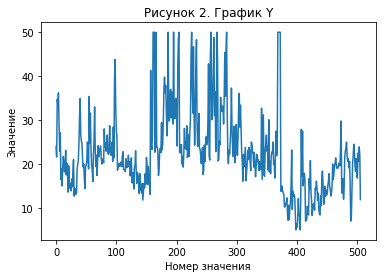

In [5]:
plt.plot(data.target)
plt.xlabel('Номер значения')
plt.ylabel('Значение')
plt.title('Рисунок 2. График Y')
plt.show()

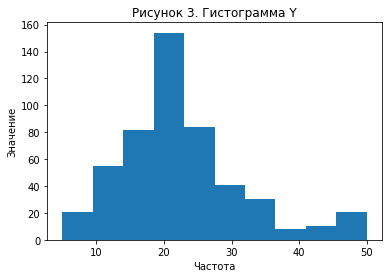

In [6]:
plt.hist(data.target)
plt.xlabel('Частота')
plt.ylabel('Значение')
plt.title('Рисунок 3. Гистограмма Y')
plt.show()

In [7]:
print(np.percentile(data.data, 1))
print(np.percentile(data.data, 25))
print(np.median(data.data))
print(np.percentile(data.data, 75))
print(np.percentile(data.data, 99))

0.0
0.74
6.656000000000001
24.0
666.0


In [8]:
print(np.mean(data.data))
print(np.std(data.data))

70.0724468257829
145.15621329858195


In [9]:
print(np.mean(data.target))
print(np.std(data.target))

22.532806324110677
9.188011545278203


Разделите выборку на две части: обучающую и тестовую (пропорции 3:1). На одной из частей мы будем обучать модель, а на другой - измерять качество модели

In [10]:
X = data.data
y = data.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


 Обучите модель линейной регресии на этих данных с помощью модуля sklearn (используйте sklearn.linear_models.LinearRegression аналогично тому, как использовался RandomForestClassifier в материалах лекции)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
clf = LinearRegression().fit(X_train,y_train)

Получите прогнозы модели на тестовых данных. Какова среднеквадратичная ошибка? 

In [15]:
y_pred = clf.predict(X_test)

In [16]:
y_pred[:10]

array([20.08177112, 14.35148333, 28.59205491, 12.88042055, 38.82762055,
       28.35564337, 12.89777647, 31.20428267, 14.45708014, 27.3810617 ])

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_squared_error(y_pred,y_test)

22.401516542523254

In [19]:
import scipy.optimize
import numpy as np

In [20]:
def error(guess):
    return mean_squared_error(np.ones_like(y_train)*guess,y_train)
scipy.optimize.minimize(error, 40)

      fun: 86.41538195919003
 hess_inv: array([[0.50000003]])
      jac: array([1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([22.49920877])

In [21]:
error (22.65408902)

86.4393699522376

Вывод: модель на константе хуже, так как

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_pred,y_test)

0.6287717436872322

Попробуйте аналогичным образом обучить на этих же данных какой-нибудь другой регрессор из sklearn (например, sklearn.svm.SVR, sklearn.ensemble.RandomForestRegressor или другую модель на Ваш выбор)

In [25]:
from sklearn.svm import SVR

In [26]:
#help (SVR)

In [27]:
clf = SVR().fit(X_train,y_train)

In [28]:
y2_pred = clf.predict(X_test)

In [29]:
y2_pred[:10]

array([21.11356123, 21.11233765, 21.1981316 , 21.11235289, 21.12402351,
       21.11235293, 21.11235289, 21.1123529 , 18.77165392, 21.11545677])

In [30]:
mean_squared_error(y2_pred,y_test)

78.5790387999851

In [31]:
r2_score(y2_pred,y_test)

-517.9279373967787

Вывод: первая модель, построенная методом LinearRegression более адекватна исходным данным, так как она имеет меньшее значение квадратичной ошибки и большее значение коэффициента детерминации

In [32]:
# data.data
l = [1, 3, 4, 7]
print(l.index(4))

2


In [38]:
type(data.data)

numpy.ndarray

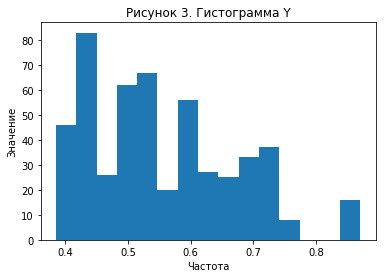

In [46]:
plt.hist(data.data[:,4],bins=15)
plt.xlabel('Частота')
plt.ylabel('Значение')
plt.title('Рисунок 3. Гистограмма Y')
plt.show()

In [43]:
help (plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
